In [0]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [0]:
names = [  
    "airplane",										
    "automobile",									
    "bird",									
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

ANS: deer


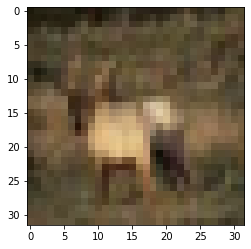

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 3 
print("ANS:", names[y_train[idx][0]])
plt.imshow(x_train[idx])
# x_train[idx]

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential()
# 一個filter(3 * 3 * 3) * 64(個) + 64(bias) = 1792
model.add(Conv2D(64, 
                 (3, 3),
                 padding="same",
                 activation="relu",
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D())
# 一個filter(3 * 3 * 64) * 128 + 128(bias) = 73856
model.add(Conv2D(128, 
                 (3, 3),
                 padding="same",
                 activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(256, 
                 (3, 3),
                 padding="same",
                 activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [11]:
# batch_size: 問多少筆資料進行一次梯度下降(平均)
# epochs: 整份資料要看幾遍
# validation_split: train_test_split驗證模型到底好不好
# verbose: log level(0:沒有 1:最多 2:適中)
# 270: 54000(train) / 200
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
stop_callback = EarlyStopping(patience=3, restore_best_weights=True)
save_callback = ModelCheckpoint("fashion.h5", save_best_only=True)
model.fit(x_train_norm, 
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          callbacks=[stop_callback, save_callback],
          verbose=2)

Epoch 1/100
225/225 - 8s - loss: 1.6283 - accuracy: 0.4065 - val_loss: 1.2652 - val_accuracy: 0.5494
Epoch 2/100
225/225 - 7s - loss: 1.1945 - accuracy: 0.5748 - val_loss: 1.0075 - val_accuracy: 0.6468
Epoch 3/100
225/225 - 7s - loss: 1.0005 - accuracy: 0.6482 - val_loss: 0.9144 - val_accuracy: 0.6810
Epoch 4/100
225/225 - 7s - loss: 0.8713 - accuracy: 0.6958 - val_loss: 0.8368 - val_accuracy: 0.7094
Epoch 5/100
225/225 - 7s - loss: 0.7810 - accuracy: 0.7291 - val_loss: 0.7689 - val_accuracy: 0.7352
Epoch 6/100
225/225 - 7s - loss: 0.7008 - accuracy: 0.7567 - val_loss: 0.7257 - val_accuracy: 0.7578
Epoch 7/100
225/225 - 7s - loss: 0.6333 - accuracy: 0.7801 - val_loss: 0.6887 - val_accuracy: 0.7682
Epoch 8/100
225/225 - 7s - loss: 0.5738 - accuracy: 0.7997 - val_loss: 0.6946 - val_accuracy: 0.7640
Epoch 9/100
225/225 - 7s - loss: 0.5054 - accuracy: 0.8239 - val_loss: 0.6646 - val_accuracy: 0.7780
Epoch 10/100
225/225 - 7s - loss: 0.4627 - accuracy: 0.8366 - val_loss: 0.6851 - val_accura

In [14]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7095 - accuracy: 0.7703


[0.7095089554786682, 0.7702999711036682]

In [18]:
# predict: 機率 predict_classes: 類別
pre = model.predict_classes(x_test_norm)
print(pre.shape)
pre

(10000,)


array([3, 8, 8, ..., 5, 4, 7])

In [22]:
print(y_test.shape)
y_test_1d = y_test.reshape(-1)
print(y_test_1d.shape)
print(y_test_1d)

(10000, 1)
(10000,)
[3 8 8 ... 5 1 7]


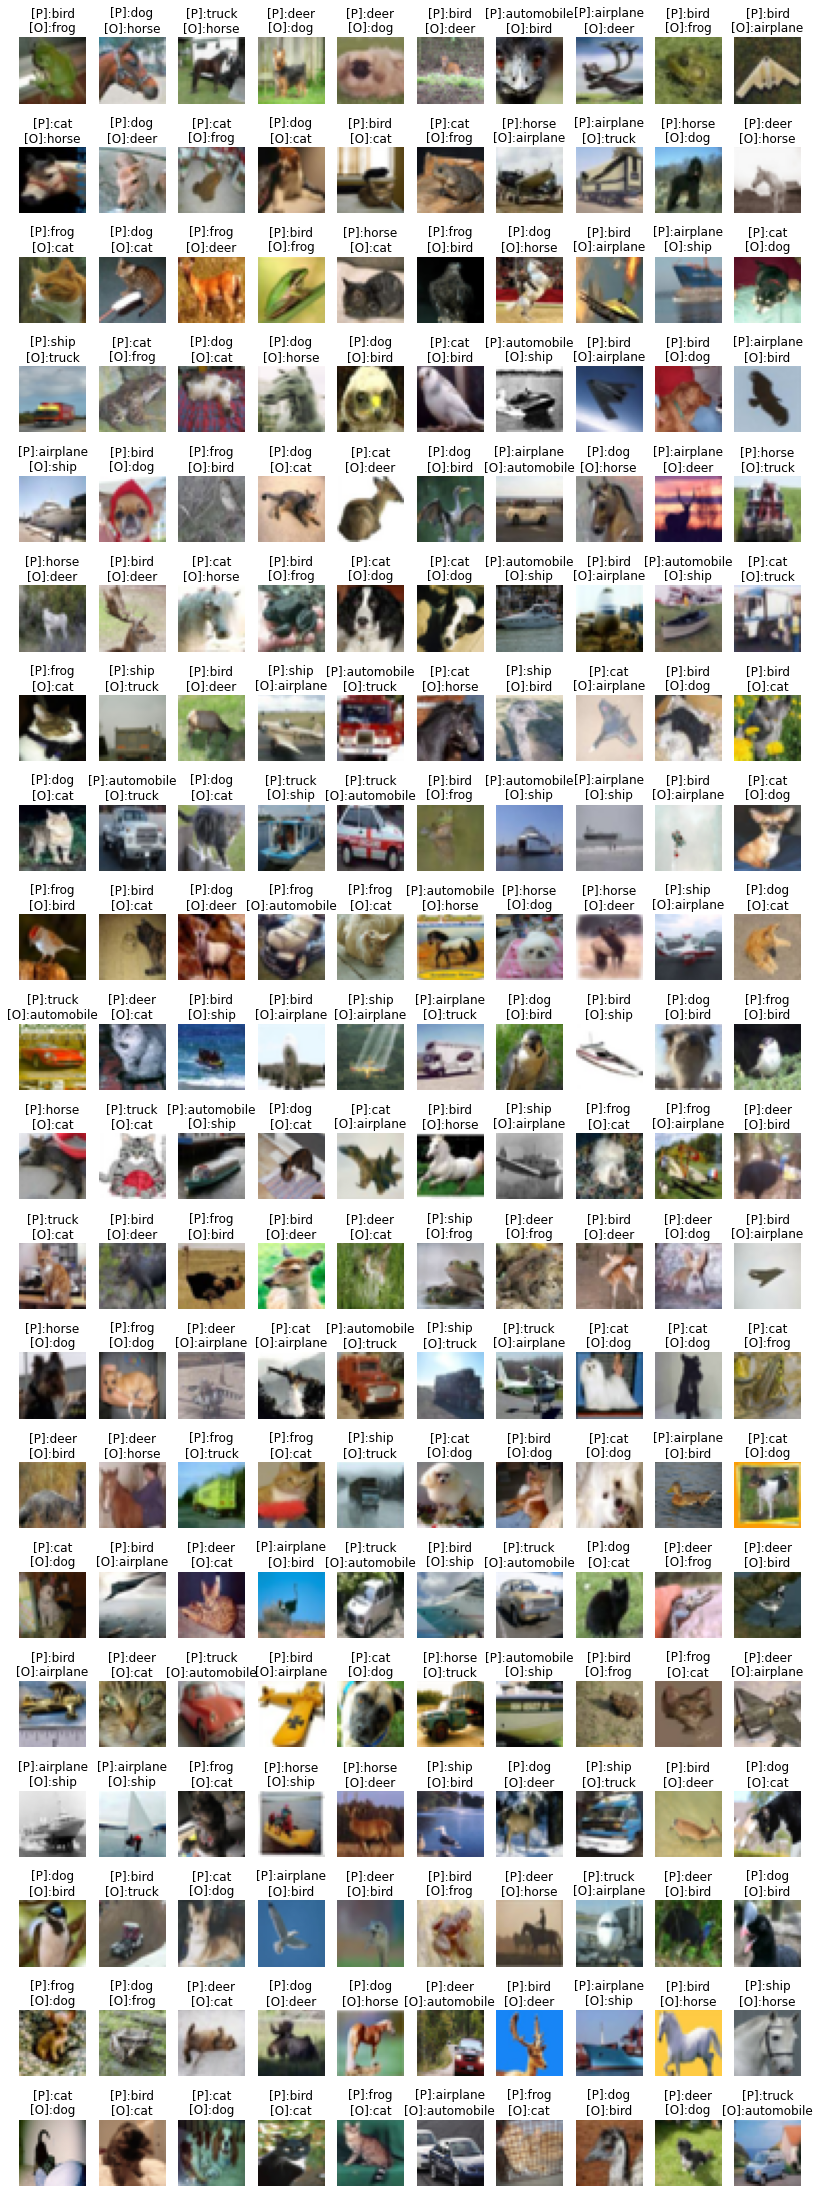

In [24]:
import numpy as np
# [:200]: 太多錯, 我只取前兩百個
idx = np.nonzero(pre != y_test_1d)[0][:200]
false_pre_img = x_test[idx]
false_pre_label = y_test_1d[idx]
false_pre_predict = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_pre_img):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(names[false_pre_predict[i]],
                                names[false_pre_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

檔名:test7.jpg
正確答案應該是: bird


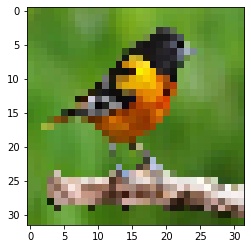

In [29]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名:")
img_raw = load_img(f, target_size=(32, 32))
img = np.array(img_raw).reshape(1, 32, 32, 3) / 255
answer = model.predict_classes(img)[0]
print("正確答案應該是:", names[answer])
plt.imshow(img_raw)